In [2]:
# pip install -r requirements.txt

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [4]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
Y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables)

Y.head()

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


In [5]:
df = pd.DataFrame.join(X,Y)

df.value_counts('income')

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

In [6]:
df['income'] = df['income'].str.strip('.').str.strip()
df.value_counts('income')

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [7]:
objects = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
keys = [0]*len(objects)
dfcopy = df.copy()

for i in range(len(objects)):
    dfcopy[objects[i]], keys[i] = pd.factorize(df[objects[i]])

print(dfcopy.dtypes, '\n')
print(df.dtypes)

age                int64
workclass          int64
fnlwgt             int64
education          int64
education-num      int64
marital-status     int64
occupation         int64
relationship       int64
race               int64
sex                int64
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country     int64
income            object
dtype: object 

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


In [8]:
for col in objects:
    print(df.value_counts(col),'\n')

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64 

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64 

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64 

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial

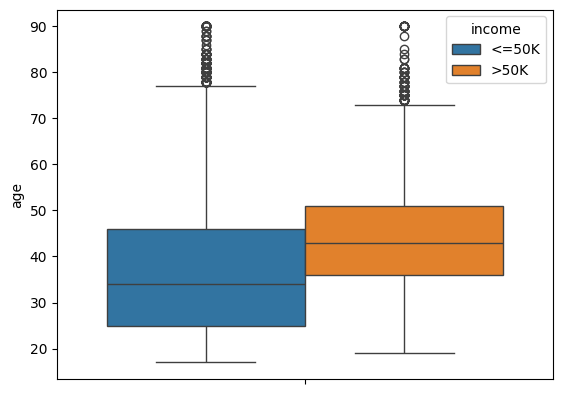

<Axes: xlabel='count', ylabel='sex'>

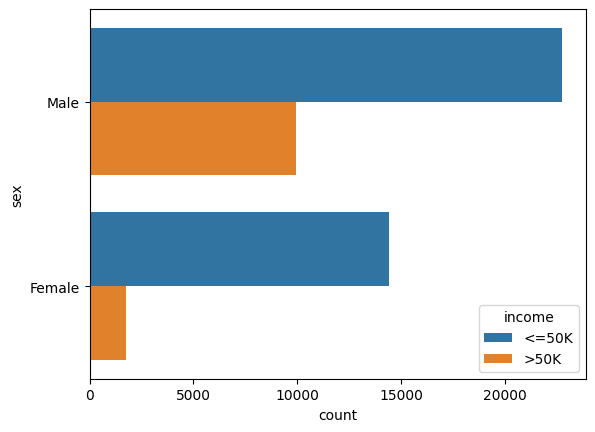

In [9]:
plt.figure()
sns.boxplot(df,y='age',hue='income')
plt.show()

plt.figure()
sns.countplot(df,y='sex',hue='income')

In [10]:
male = [0,0]
female = [0,0]

for i in range(df.shape[0]):
    if df['sex'][i] == 'Male':
        if df['income'][i] == '<=50K':
            male[0] += 1
        else:
            male[1] += 1
    else:
        if df['income'][i] == '<=50K':
            female[0] += 1
        else:
            female[1] += 1
(male,female)
print(male[1]/male[0],female[1]/female[0])

0.43630124934013725 0.1226513208070443


In [16]:
df['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands', nan], dtype=object)

In [17]:
df['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [22]:
print(round(df.describe()),2)

           age     fnlwgt  education-num  capital-gain  capital-loss  \
count  48842.0    48842.0        48842.0       48842.0       48842.0   
mean      39.0   189664.0           10.0        1079.0          88.0   
std       14.0   105604.0            3.0        7452.0         403.0   
min       17.0    12285.0            1.0           0.0           0.0   
25%       28.0   117550.0            9.0           0.0           0.0   
50%       37.0   178144.0           10.0           0.0           0.0   
75%       48.0   237642.0           12.0           0.0           0.0   
max       90.0  1490400.0           16.0       99999.0        4356.0   

       hours-per-week  
count         48842.0  
mean             40.0  
std              12.0  
min               1.0  
25%              40.0  
50%              40.0  
75%              45.0  
max              99.0   2


In [27]:
df['capital-gain'].value_counts() # heavy imbalance

capital-gain
0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
22040        1
2387         1
1639         1
1111         1
6612         1
Name: count, Length: 123, dtype: int64

In [35]:
df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [38]:
df.shape

(48842, 15)

In [39]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked',
       nan], dtype=object)

In [1]:
?classification_report

Object `classification_report` not found.
